# import modules

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# load data ...

In [2]:
stellar=pd.read_csv("/kaggle/input/stellar-classification-dataset-sdss17/star_classification.csv")

# Read and explore data

In [3]:
stellar.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [4]:
stellar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [5]:
stellar.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [6]:
stellar.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [7]:
stellar['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [8]:
stellar.sort_values("class")

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
58230,1.237655e+18,142.047959,51.231393,21.97755,21.53166,21.32114,20.86099,20.36108,2243,301,3,168,8.215889e+18,GALAXY,0.931503,7297,57040,718
58228,1.237655e+18,140.841355,50.692416,23.41943,22.03784,21.14735,20.79810,20.37284,2243,301,3,162,8.214576e+18,GALAXY,0.255631,7296,57046,36
58227,1.237656e+18,223.984760,-1.841606,22.18194,21.53138,20.52969,19.49590,18.90042,2379,301,4,99,4.526249e+18,GALAXY,0.509081,4020,55332,479
58226,1.237656e+18,216.754539,-1.946554,25.55715,20.90226,19.11438,18.38413,17.95209,2379,301,4,51,1.033706e+18,GALAXY,0.417001,918,52404,474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46329,1.237656e+18,251.580659,38.559354,23.41423,21.04343,19.71153,19.26199,19.02872,2335,301,1,44,1.207866e+19,STAR,-0.000387,10728,58248,38
46330,1.237662e+18,237.215497,25.986546,17.54356,16.42303,15.91468,15.71449,15.61154,3900,301,1,677,2.768660e+18,STAR,-0.000482,2459,54544,261
46331,1.237647e+18,109.885032,0.048816,22.43742,19.55231,18.46435,18.01848,17.74893,308,301,3,24,8.388053e+18,STAR,0.000177,7450,56722,358
75082,1.237650e+18,158.030632,-1.411047,21.96090,20.85199,20.60211,20.44812,20.24777,1140,301,5,34,4.261743e+18,STAR,0.000930,3785,55273,769


In [9]:
stellar['class'].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

# visualization

<Axes: xlabel='class', ylabel='count'>

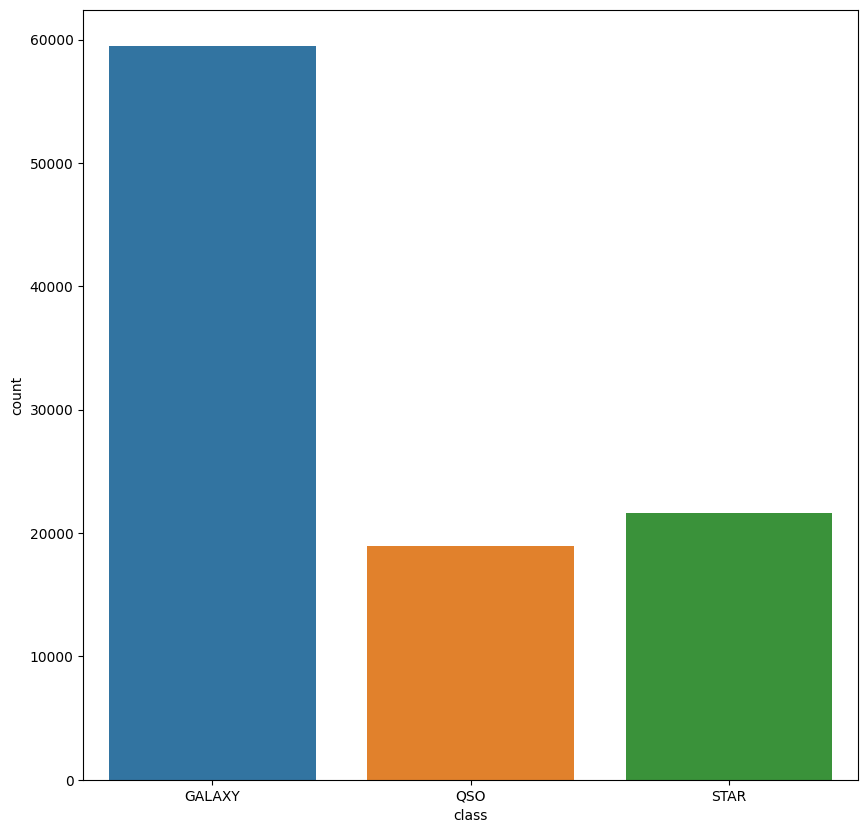

In [10]:
plt.figure(figsize=(10,10))
sns.countplot(data=stellar,x="class")

([<matplotlib.patches.Wedge at 0x7b3786b56aa0>,
 [Text(-0.3216272247940852, 1.051929621348907, 'GALAXY'),
  Text(-0.3239728189314008, -1.0512095949874325, 'STAR'),
  Text(0.9105454841380407, -0.6171765722350625, 'QSO')],
 [Text(-0.1754330317058646, 0.5737797934630402, '59%'),
  Text(-0.17671244668985497, -0.5733870518113268, '22%'),
  Text(0.49666117316620395, -0.33664176667367046, '19%')])

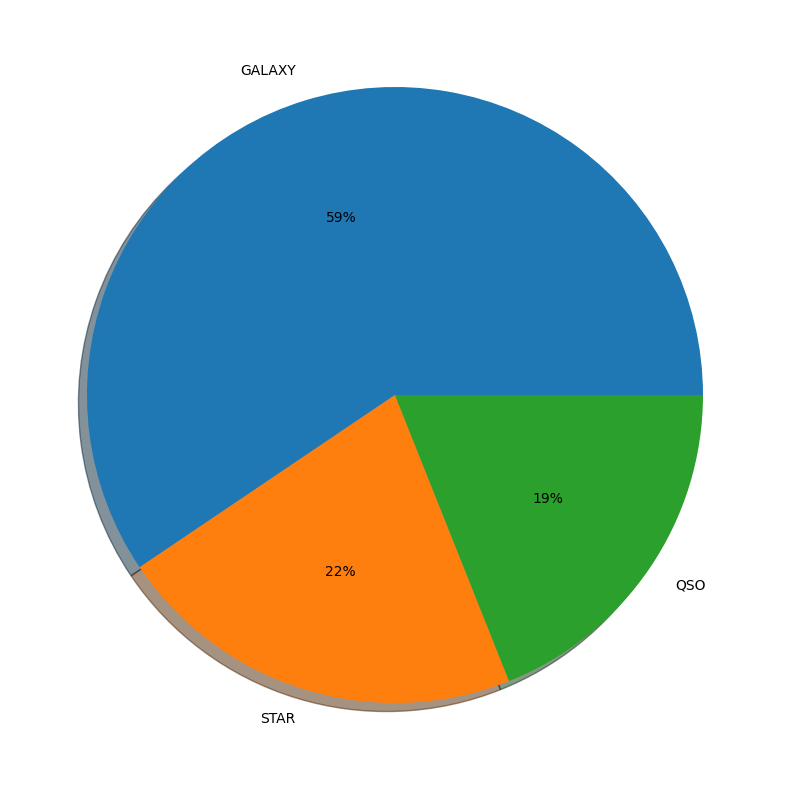

In [11]:
plt.figure(figsize=(10,10))
plt.pie(x=stellar['class'].value_counts(),labels=["GALAXY","STAR","QSO"],autopct="%1.f%%",shadow=True)

<Axes: xlabel='alpha', ylabel='delta'>

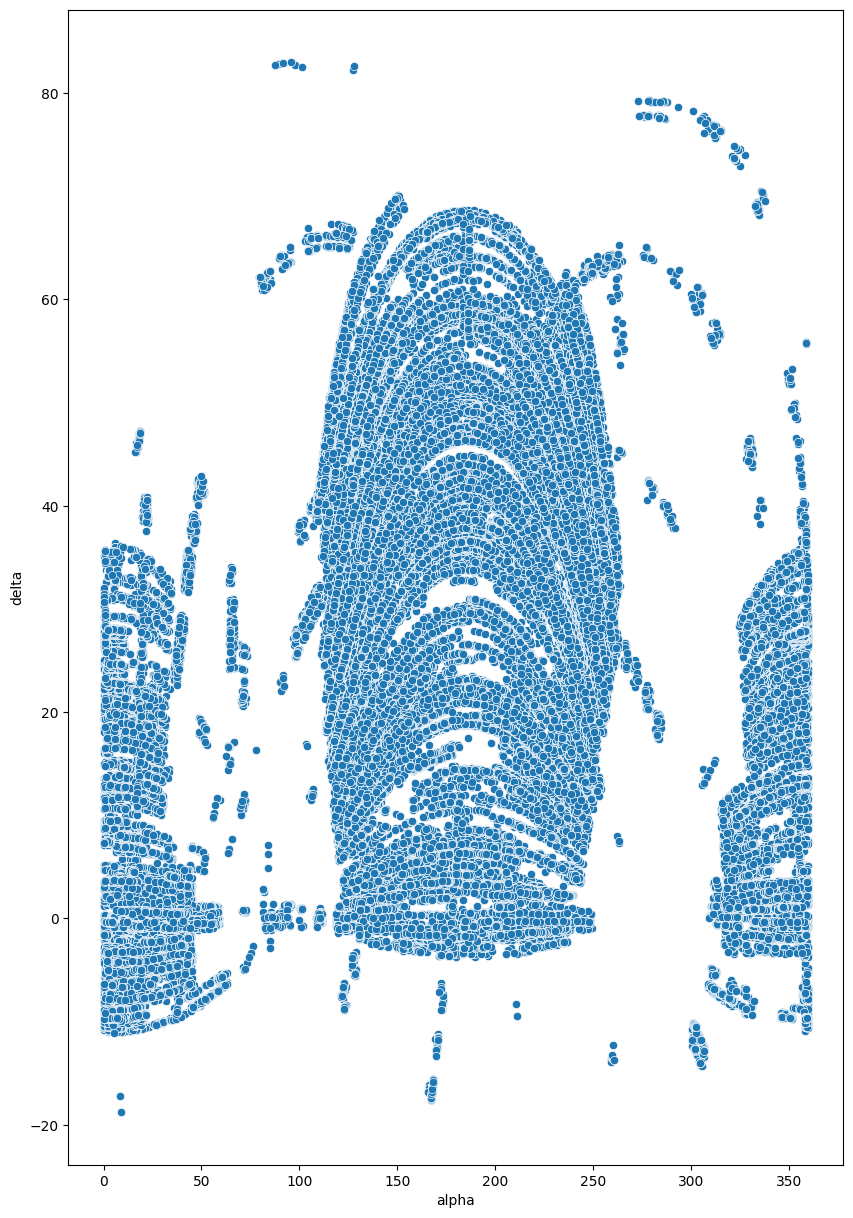

In [12]:
plt.figure(figsize=(10,15))
sns.scatterplot(data=stellar,x="alpha",y="delta")

In [13]:
if "obj_ID" in stellar.columns.values:
    stellar.drop(["obj_ID", "run_ID", "rerun_ID", "cam_col", "field_ID", "spec_obj_ID"],axis=1,inplace=True)
stellar 

,alpha,delta,u,g,r,i,z,class,redshift,plate,MJD,fiber_ID
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794,5812,56354,171
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136,10445,58158,427
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195,4576,55592,299
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346,9149,58039,775
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,GALAXY,0.000000,9374,57749,438
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,GALAXY,0.404895,7626,56934,866
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,GALAXY,0.143366,2764,54535,74
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,GALAXY,0.455040,6751,56368,470


# preprocessing & correlation matrix & feature selection 

In [14]:
encoder=LabelEncoder()
stellar['class']=encoder.fit_transform(stellar['class'])


Text(0.5, 1.0, ' stellar correlation matrix')

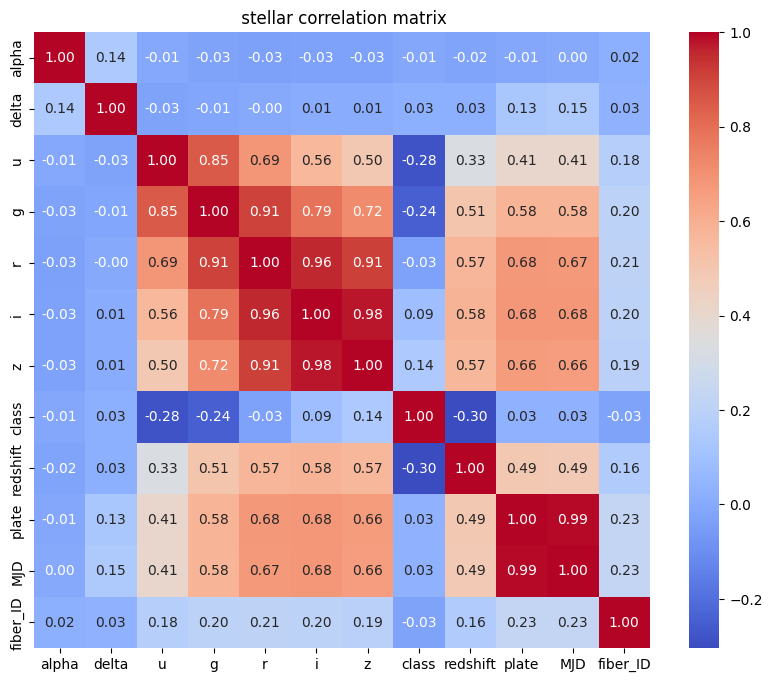

In [15]:
corr_matt=stellar.corr(method="spearman")
plt.figure(figsize=(10,8))
sns.heatmap(corr_matt,annot=True,fmt="0.2f",cmap="coolwarm",square=True)
plt.title(" stellar correlation matrix")

In [16]:
x=stellar.drop("class",axis=1)
y=stellar['class']


In [17]:
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)

# Tarin / Test split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.3,random_state=42)

In [19]:
x_train.shape

(70000, 11)

In [20]:
x_test.shape

(30000, 11)

# Support vector machine
train & evaluate & confusion matrix

In [21]:
model_svc=SVC()

In [22]:
model_svc.fit(x_train,y_train)

SVC()

In [23]:
y_pre=model_svc.predict(x_test)
accuracy=accuracy_score(y_test,y_pre)
print("accurcy:",accuracy)

accurcy: 0.9601


<Axes: >

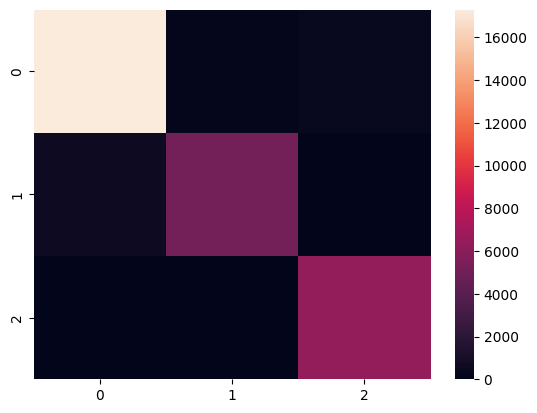

In [24]:
cm=confusion_matrix(y_test,y_pre)
sns.heatmap(cm)

# Random forest 
train & evaluate & confusion matrix

In [25]:
model_Random=RandomForestClassifier()
model_Random.fit(x_train,y_train)

RandomForestClassifier()

In [26]:
y_pre_random=model_Random.predict(x_test)
accuracy_r=accuracy_score(y_test,y_pre_random)
print(" Random forest accurcy:",accuracy_r)

 Random forest accurcy: 0.9790333333333333


<Axes: >

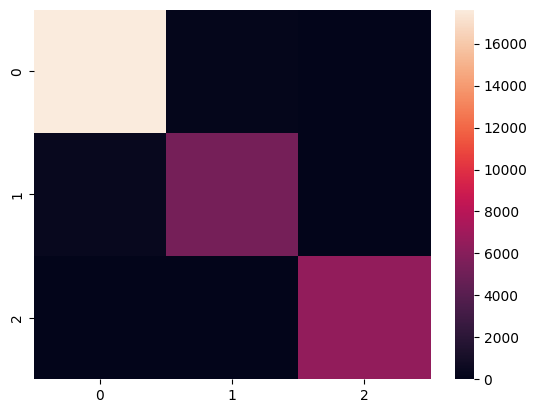

In [27]:
cm=confusion_matrix(y_test,y_pre_random)
sns.heatmap(cm)

# XGBoost
train & evaluate & confusion matrix

In [28]:
model_XG=XGBClassifier()
model_XG.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [29]:
y_pre_XG=model_XG.predict(x_test)
accuracy_XG=accuracy_score(y_test,y_pre_XG)
print(" Random forest accurcy:",accuracy_XG)

 Random forest accurcy: 0.9769


<Axes: >

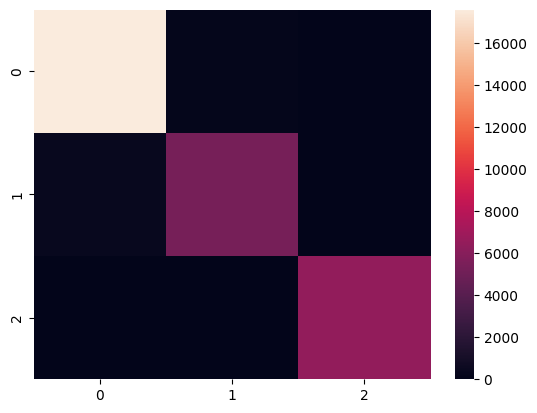

In [30]:
cm=confusion_matrix(y_test,y_pre_XG)
sns.heatmap(cm)